# IPL Data Analysis
## Author: Kush Mehta

In [8]:
import pandas as pd
import numpy as np

In [10]:
deliveries = pd.read_csv('/Users/kush/Desktop/archive/deliveries.csv')
matches = pd.read_csv('/Users/kush/Desktop/archive/matches.csv')

## Checking the health of the Data

In [12]:
print(deliveries.head())
print(deliveries.info())
print(deliveries.describe())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [14]:
print(matches.head())
print(matches.info())
print(matches.describe())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

## Cleaning the Data

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Check for duplicated values
matches.duplicated().sum()
deliveries.duplicated().sum()

0

In [35]:
# Checking the format for city so that I can discard values that are NaN
matches[matches['city'].isna()]['venue'].unique()

array([], dtype=object)

In [28]:
# Filling missing city values based on venue
matches.loc[(matches['city'].isna()) & (matches['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'
matches.loc[(matches['city'].isna()) & (matches['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'
matches['city'].isnull().sum()

0

In [33]:
# Correcting the format for the matches
matches.replace({'season': {"2020/21": "2020", "2009/10": "2010", "2007/08": "2008"}}, inplace=True)

In [37]:
# Correcting Team Names in the Data (i.e. for teams that have had their names changed)

team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bangalore",
          "Royal Challengers Bengaluru":"Royal Challengers Bangalore",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Kings XI Punjab",
          "Punjab Kings":"Kings XI Punjab",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
          "Pune Warriors":"Pune Warriors",
          "Rising Pune Supergiant":"Pune Warriors",
          "Rising Pune Supergiants":"Pune Warriors",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}

#For Matches 
matches['team1']= matches['team1'].map(team_map)
matches['team2']= matches['team2'].map(team_map)
matches['winner']= matches['winner'].map(team_map)
matches['toss_winner']= matches['toss_winner'].map(team_map)

#For Deliveries 
deliveries['batting_team']= deliveries['batting_team'].map(team_map)
deliveries['bowling_team']= deliveries['bowling_team'].map(team_map)

In [39]:
#Identifying Match Trends over the years
matches['season'].value_counts().to_frame().T

season,2013,2023,2012,2022,2011,2024,2018,2021,2020,2019,2016,2014,2010,2017,2015,2008,2009
count,76,74,74,74,73,71,60,60,60,60,60,60,60,59,59,58,57


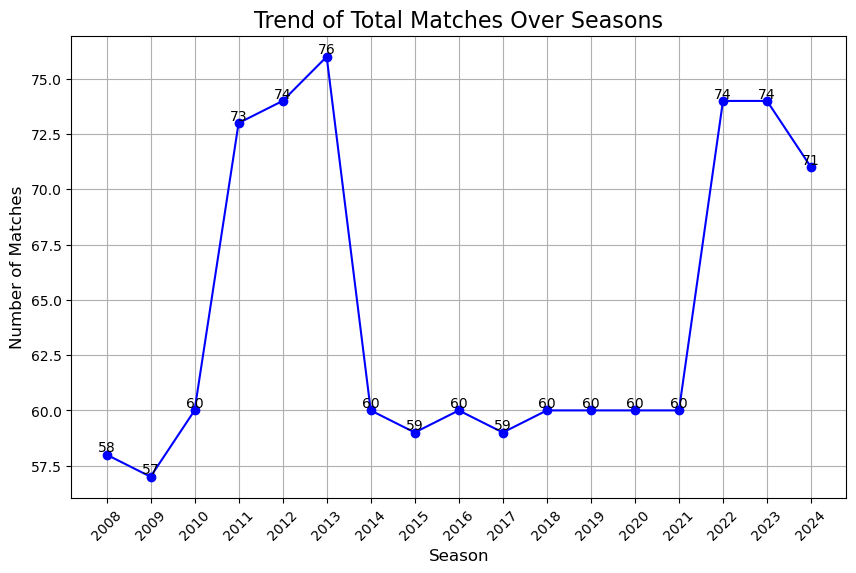

In [41]:
import matplotlib.pyplot as plt

season_counts = matches['season'].value_counts().sort_index()

# Ploting the trend as a line chart
plt.figure(figsize=(10, 6))  
plt.plot(season_counts.index, season_counts.values, marker='o', linestyle='-', color='blue')

# Adding titles and labels
plt.title('Trend of Total Matches Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Annotating each data point with the value
for i, value in enumerate(season_counts.values):
    plt.text(season_counts.index[i], value, str(value), fontsize=10, ha='center', va='bottom')
plt.xticks(rotation=45)  
plt.grid(True)           
plt.show()

## Finding Match Statistics

In [47]:
#total matches played
total_matches= (matches['team1'].value_counts()+matches['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
# Count of wins for each team
total_wins = matches['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')

# Count of wins when chasing a target
team_chasing = matches[matches['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')

# Count of wins when batting first
team_batting_first = matches[matches['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')

# Merge all the DataFrames
merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer') 
    
# Fill NaN values with 0
merged_df= merged_df.fillna(0)
#sorting by total match played
merged_df.sort_values(by='Total_Match_Played', ascending=False, inplace=True)

In [49]:
# Display the final DataFrame
merged_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Mumbai Indians,261,144,90,54.0
Chennai Super Kings,238,138,75,63.0
Kolkata Knight Riders,251,131,81,50.0
Royal Challengers Bangalore,255,123,85,38.0
Sunrisers Hyderabad,257,117,73,44.0
Delhi Capitals,252,115,73,42.0
Kings XI Punjab,246,112,84,28.0
Rajasthan Royals,221,112,69,43.0
Gujarat Titans,75,41,30,11.0


In [51]:
# Importing feature encoding tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report